# 문제 유형별 MLP 네트워크
- MLP(Multi Layer Perceptron), ANN(Artificial Neural Network), DNN (Deep Neural Network)
    - Fully Connected Layer(Dense)로 구성된 네트워크

# Regression(회귀)

## Boston Housing Dataset
보스턴 주택가격 dataset은 다음과 같은 속성을 바탕으로 해당 타운 주택 가격의 중앙값을 예측하는 문제.
- CRIM: 범죄율
- ZN: 25,000 평방피트당 주거지역 비율
- INDUS: 비소매 상업지구 비율
- CHAS: 찰스강에 인접해 있는지 여부(인접:1, 아니면:0)
- NOX: 일산화질소 농도(단위: 0.1ppm)
- RM: 주택당 방의 수
- AGE: 1940년 이전에 건설된 주택의 비율
- DIS: 5개의 보스턴 직업고용센터와의 거리(가중 평균)
- RAD: 고속도로 접근성
- TAX: 재산세율
- PTRATIO: 학생/교사 비율
- B: 흑인 비율
- LSTAT: 하위 계층 비율
<br><br>
- **Target**
    - MEDV: 타운의 주택가격 중앙값(단위: 1,000달러)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# from tensorflow.keras.layers import Dense


import numpy as np
import matplotlib.pyplot as plt
# 딥러닝 -> 연속형: Feature scaling 전처리를 해준다.
#           범주형: One Hot Encoding
from sklearn.preprocessing import StandardScaler

import random

In [ ]:
# random seed값 설정
tf.random.set_seed(0)
np.random.seed(0)
random.seed(0)

##### 데이터 로딩

In [7]:
(train_X, y_train), (test_X, y_test) = keras.datasets.boston_housing.load_data()
print(train_X.shape, y_train.shape)
print(test_X.shape, y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


In [8]:
print(train_X[0])
print(y_train[0])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


##### 하이퍼파라미터, 변수 정의
- 하이퍼파라미터와 중복되서 사용할 변수들을 미리 모아서 정의하면 관리하기 편리하다.

In [ ]:
#하이퍼파라미터 변수

# 학습율 => 파라미터 업데이트시 계산된 gradient를 파라미터에 적용할 비율. 0 ~ 1 사이 실수를 지정한다. optimizer 생성때 설정.
LEARNING_RATE = 0.001  
N_EPOCH = 100 # 에폭수
N_BATCH = 200 # Train 배치사이즈

##### X, y 전처리
- MLP는 선형모델을 기반으로 하므로 Feature scaling을 해준다.

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(train_X)
X_test = scaler.transform(test_X)

##### 모델 구현

1. 모델 객체 생성 - Sequential
2. 모델에 Layer들 추가
    - Input Layer 추가
        - 입력 데이터의 shape을 지정한다.
        1. InputLayer 객체를 생성해서 추가한다.
        2. 첫번째 Hidden Layer에 input_shape 매개변수에 shape을 지정하여 추가한다.
    - Hidden Layer들 추가
        - Layer의 개수와 Layer의 Unit의 개수는 튜닝대상으로 성능에 영향을 준다.
        - 활성함수는 ReLU 를 사용한다.
        - Layer의 개수와 Unit 개수가 많을 수록 복잡한 모델, 적을 수록 단순한 모델이된다.
    - Output Layer 추가
        - 풀려는 문제에 따라 unit개수와 활성함수를 지정한다.

In [11]:
y_train.shape

(404,)

In [ ]:
def get_model_boston(lr=0.01):
    model = keras.Sequential()
   
    model.add(layers.Dense(units=32, activation='relu', input_shape=(13, )))
    model.add(layers.Dense(units=16, activation='relu'))
    model.add(layers.Dense(units=8, activation='relu'))
    

    # 집값 한개의 값을 추론하므로 unit수를 1로 지정. 
    model.add(layers.Dense(units=1))
    
    # 컴파일
    # optimizer를 파라미터값들을 모두 default로 설정해서 생성할 경우 문자열로 지정. ("adam")    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),
                  loss='mse')
    return model

In [15]:
model_boston = get_model_boston()

# 딥러닝 모델의 구조 확인
model_boston.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                448       
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 8)                 136       
                                                                 
 output (Dense)              (None, 1)                 9         
                                                                 
Total params: 1121 (4.38 KB)
Trainable params: 1121 (4.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


```
_________________________________________________________________
 Layer-이름 (type-Class)       Output Shape (출력결과의 shape)      Param # (weight+bias개수)  
=================================================================
 dense (Dense)               (None, 32)                448       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 output (Dense)               (None, 1)                 9         
                                                                 
=================================================================
전체 파라미터 개수
Total params: 1121 (4.38 KB)
Trainable params: 1121 (4.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
```

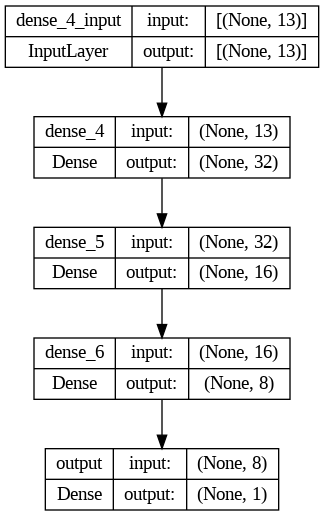

In [18]:
keras.utils.plot_model(model_boston, show_shapes=True)

##### 학습(Train)

In [19]:
hist = model_boston.fit(X_train,   # Train set -> input(X)
                        y_train,   # Train set -> output(y)
                        epochs=N_EPOCH, # 에폭수(데이터셋을 몇번 학습할지.)
                        batch_size=N_BATCH, # 배치크기(데이터를 몇개씩 한번에 학습할지.)
                        validation_split=0.2 # train set중 지정한 비율의 개수를 validation 용으로 사용.

                        )

Epoch 1/100
2/2 [==============================] - 1s 198ms/step - loss: 573.1349 - val_loss: 630.9248
Epoch 2/100
2/2 [==============================] - 0s 30ms/step - loss: 554.3610 - val_loss: 613.1664
Epoch 3/100
2/2 [==============================] - 0s 37ms/step - loss: 533.3019 - val_loss: 586.6031
Epoch 4/100
2/2 [==============================] - 0s 34ms/step - loss: 505.6201 - val_loss: 549.3510
Epoch 5/100
2/2 [==============================] - 0s 30ms/step - loss: 467.5925 - val_loss: 501.3729
Epoch 6/100
2/2 [==============================] - 0s 33ms/step - loss: 420.3364 - val_loss: 442.5710
Epoch 7/100
2/2 [==============================] - 0s 35ms/step - loss: 361.9750 - val_loss: 372.8127
Epoch 8/100
2/2 [==============================] - 0s 32ms/step - loss: 294.0909 - val_loss: 292.5586
Epoch 9/100
2/2 [==============================] - 0s 31ms/step - loss: 218.6862 - val_loss: 215.6622
Epoch 10/100
2/2 [==============================] - 0s 31ms/step - loss: 154.9913

```
Epoch 1/100 (현재 epoch/총 epoch)
2/2 [==============================] - 1s 198ms/step(스텝당 걸린시간) - loss: 573.1349 - val_loss: 630.9248  (검증결과)
Epoch 2/100
2/2 [==============================] - 0s 30ms/step - loss: 554.3610 - val_loss: 613.1664
```

##### 결과 시각화
- 학습 시 epoch별 검증 결과를 시각화한다.

In [20]:
hist.history.keys()

dict_keys(['loss', 'val_loss'])

In [ ]:
hist.epoch

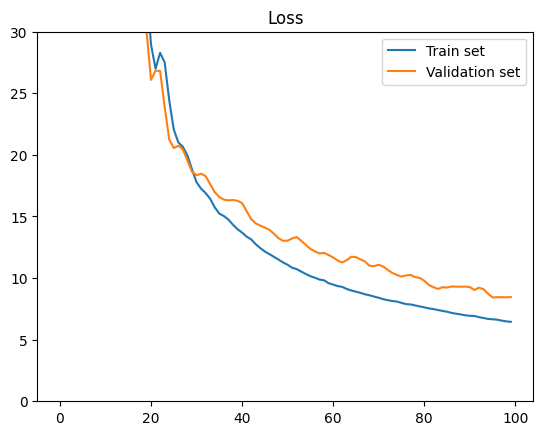

In [23]:
# hist.history : 에폭별 검증 결과
# hist.epoch : 에폭리스트
plt.plot(hist.epoch, hist.history['loss'], label='Train set')
plt.plot(hist.epoch, hist.history['val_loss'], label='Validation set')

plt.title('Loss')
plt.ylim(0, 30)
plt.legend()
plt.show()

##### 최종 테스트

In [24]:
loss = model_boston.evaluate(X_test, y_test)
print(loss)

4/4 [==============================] - 0s 3ms/step - loss: 24.0507
24.050676345825195


##### 모델 네트워크 저장

In [ ]:
import os
#### 전체 경로 안에 한글이 있으면 안된다.
saved_dir = 'saved_model/boston_model'

In [ ]:
# saved_dir = '/content/drive/MyDrive/my_model/saved_model/boston_model'
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
model_boston.save(saved_dir)

##### 새로운 데이터 추론

In [29]:
# 저장된 모델을 불러와서 추론
saved_model = keras.models.load_model(saved_dir)
saved_model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 24.0507


24.050676345825195

In [33]:
X_new = X_test[:5]
pred = saved_model.predict(X_new)
print(pred)

1/1 [==============================] - 0s 94ms/step
[[ 8.33283 ]
 [17.825748]
 [21.51342 ]
 [32.361057]
 [25.61314 ]]


In [34]:
y_test[:5]

array([ 7.2, 18.8, 19. , 27. , 22.2])

# 분류 (Classification)

## Fashion MNIST Dataset - 다중분류(Multi-Class Classification) 문제

10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 [패션 MNIST](https://github.com/zalandoresearch/fashion-mnist) 데이터셋. 
이미지는 해상도(28x28 픽셀)가 낮고 다음처럼 개별 의류 품목을 나타낸다:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>그림</b> <a href="https://github.com/zalandoresearch/fashion-mnist">패션-MNIST 샘플</a> (Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

이미지는 28x28 크기이며 Gray scale이다. *레이블*(label)은 0에서 9까지의 정수 배열이다. 아래 표는 이미지에 있는 의류의 **클래스**(class)들이다.

<table>
  <tr>
    <th>class index</th>
    <th>class name</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trousers</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

각 이미지는 하나의 레이블에 매핑되어 있다. 데이터셋에 클래스 이름이 들어있지 않기 때문에 나중에 이미지를 출력할 때 사용하기 위해 별도의 변수를 만들어 저장한다.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers

import numpy as np
import matplotlib.pyplot as plt

import os
import random

# seed 값 설정
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

In [ ]:
class_names = np.array(['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])

In [39]:
# class_names[[0, 2, 0, 1]]

array(['T-shirt/top', 'Pullover', 'T-shirt/top', 'Trousers'], dtype='<U11')

##### Data 로딩

In [40]:
(train_image, y_train), (test_image, y_test) = keras.datasets.fashion_mnist.load_data()
train_image.shape, y_train.shape, test_image.shape, y_test.shape

4422102/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [41]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

##### validatation dataset set  분리
- Train set을 Train/validation set으로 분리

##### 이미지 확인

In [42]:
y_train[2]

0

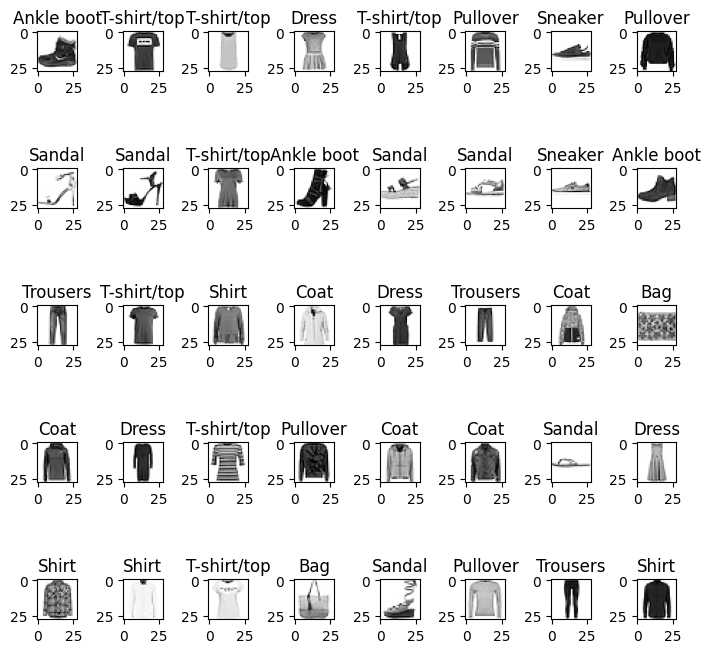

In [45]:
cnt = 25  # 확인할 이미지개수 (5배수)
plt.figure(figsize=(7,7))
for i in range(cnt):
    plt.subplot(5, int(cnt/5), i+1)
    plt.imshow(train_image[i], cmap='Greys')  # gray: 0-black, 255: white,  Greys: 0-white, 255-black
    label = class_names[y_train[i]]
    plt.title(label)

plt.tight_layout()
plt.show()

#### 하이퍼파라미터, 변수 설정

In [ ]:
LEARNING_RATE = 0.001  # 학습률
N_EPOCH = 20          # 에폭수
N_BATCH = 1000         # 배치 사이즈

#### X, y  전처리
- y값 처리
    1. 다중 분류에서 label encoding 형식의 label을 one hot encoding 처리 ==> loss: categorical_crossentropy
    2. label encoding 형식의 label을 그대로 모델에 전달. => loss: sparse_categorical_crossentropy
        - one hot encoding 처리를 loss가 대신 한다.

- x값(이미지) 처리
    - dtype을 uint8에서 float32로 변환한다.
    - 0 ~ 1 정규화. X/255.0으로 나눈다.

In [47]:
train_image.dtype

dtype('uint8')

In [ ]:
X_train = train_image.astype('float32')/255.0
X_test = test_image.astype('float32')/255.0

In [49]:
print(train_image.min(), train_image.max())
print(X_train.min(), X_train.max())

0 255
0.0 1.0


In [50]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

##### 모델 생성 및 컴파일

In [ ]:
def get_model_fashion(lr=0.01):
    model = keras.Sequential()
    
    model.add(layers.Flatten(input_shape=(28, 28)))
    
    # Dense Layer의 Unit개수는 점점 줄여나가는 패턴을 사용.
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    
    # output layer
    ## class 별 확률을 출력해야하므로 activation은 softmax를 사용하고 fashion mnist class개수인 10을 unit개수로 지정한다.
    model.add(layers.Dense(10, activation='softmax', name='output'))
    
    # 컴파일
    # 다중분류 loss함수:
    #   y가 one hot encoding이 안된 경우: sparse_categorical_crossentropy  (원핫인코딩 후 loss를 계산한다.)
    #   y를 one hot encoding 한 경우: categorical_crossentropy
    model.compile(optimizer=optimizers.Adam(learning_rate=lr), 
                  loss='sparse_categorical_crossentropy',   
                  metrics=['accuracy']
                 )
    return model

In [57]:
model_fashion = get_model_fashion(LEARNING_RATE)
model_fashion.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 256)               200960    
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 244522 (955.16 KB)
Trainable params: 244

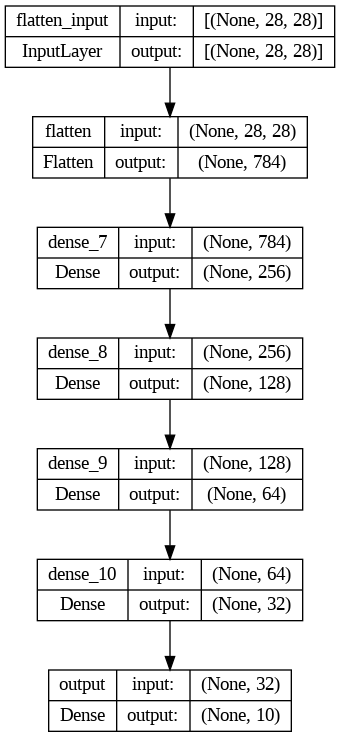

In [54]:
keras.utils.plot_model(model_fashion, show_shapes=True)

##### Train(학습)

In [58]:
hist = model_fashion.fit(X_train, y_train,
                         epochs=N_EPOCH,
                         batch_size=N_BATCH,
                         validation_split=0.2)

Epoch 1/20
48/48 [==============================] - 3s 38ms/step - loss: 0.9097 - accuracy: 0.6946 - val_loss: 0.5737 - val_accuracy: 0.7972
Epoch 2/20
48/48 [==============================] - 2s 33ms/step - loss: 0.4960 - accuracy: 0.8266 - val_loss: 0.4515 - val_accuracy: 0.8423
Epoch 3/20
48/48 [==============================] - 2s 33ms/step - loss: 0.4253 - accuracy: 0.8517 - val_loss: 0.4373 - val_accuracy: 0.8453
Epoch 4/20
48/48 [==============================] - 2s 33ms/step - loss: 0.3927 - accuracy: 0.8624 - val_loss: 0.4036 - val_accuracy: 0.8597
Epoch 5/20
48/48 [==============================] - 1s 30ms/step - loss: 0.3684 - accuracy: 0.8696 - val_loss: 0.3962 - val_accuracy: 0.8618
Epoch 6/20
48/48 [==============================] - 2s 45ms/step - loss: 0.3543 - accuracy: 0.8737 - val_loss: 0.3705 - val_accuracy: 0.8699
Epoch 7/20
48/48 [==============================] - 2s 49ms/step - loss: 0.3284 - accuracy: 0.8831 - val_loss: 0.3589 - val_accuracy: 0.8740
Epoch 8/20
48

In [60]:
60000*0.8/1000

48.0

In [ ]:
1s 30ms/step - loss: 0.2143 - accuracy: 0.9209 - val_loss: 0.3204 - val_accuracy: 0.8898

##### 결과 시각화
- 학습 시 epoch별 검증 결과를 시각화한다.

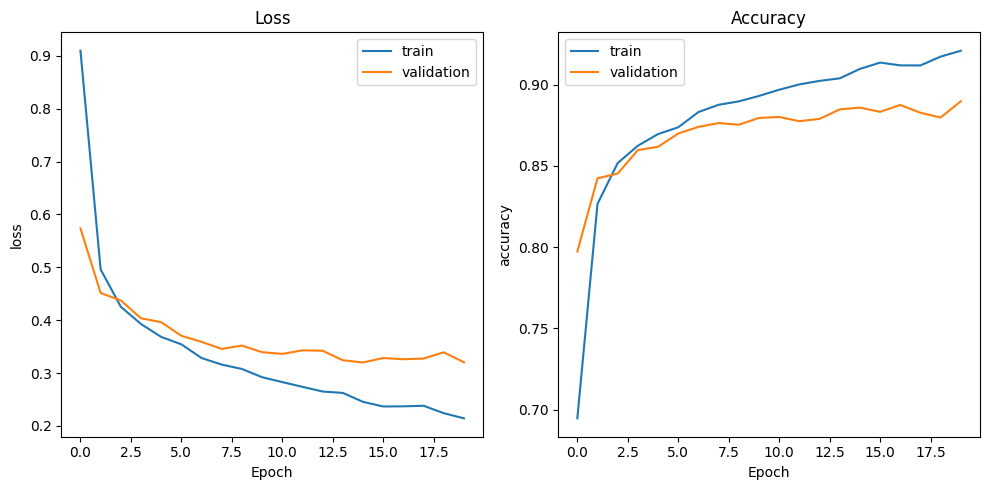

In [61]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(hist.epoch, hist.history['loss'], label="train")
plt.plot(hist.epoch, hist.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.epoch, hist.history['accuracy'], label='train')
plt.plot(hist.epoch, hist.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()

plt.tight_layout()
plt.show()

#### 최종평가

In [62]:
loss, acc = model_fashion.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3399 - accuracy: 0.8819


In [63]:
print(f"테스트결과: Loss: {loss}, 정확도: {acc}")

테스트결과: Loss: 0.3398779332637787, 정확도: 0.8819000124931335


#### 모델저장

In [65]:
# import os
# base_dir = "/content/drive/MyDrive/my_model"
# save_dir_fashion = os.path.join(base_dir,'saved_model/fashion_mnist_model')
# print(save_dir_fashion)

/content/drive/MyDrive/my_model/saved_model/fashion_mnist_model


In [ ]:
save_dir_fashion = 'saved_model/fashion_mnist_model'

In [ ]:
model_fashion.save(save_dir_fashion)

#### 새로운 데이터 추론

In [67]:
# 저장된 모델을 loading해서 추론
saved_model_fashion = keras.models.load_model(save_dir_fashion)
saved_model_fashion.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3399 - accuracy: 0.8819


[0.3398779332637787, 0.8819000124931335]

In [68]:
new_X = X_test[1000:1010]
new_X.shape

(10, 28, 28)

In [69]:
pred = saved_model_fashion.predict(new_X)
pred.shape

1/1 [==============================] - 0s 89ms/step


(10, 10)

In [70]:
pred

array([[1.6904451e-01, 4.5912813e-07, 7.7732920e-04, 3.3558946e-04,
        8.8801079e-07, 6.7237681e-13, 8.2983309e-01, 4.1476831e-09,
        8.1057779e-06, 4.7586468e-08],
       [1.8662295e-05, 1.0630459e-06, 1.5083683e-05, 9.9970567e-01,
        1.9168983e-04, 1.1929228e-11, 6.3967731e-05, 6.5385634e-11,
        3.9474539e-06, 2.4995865e-08],
       [3.7067946e-11, 1.0433397e-08, 9.0618499e-07, 6.6944438e-07,
        6.2185861e-09, 9.9998862e-01, 8.2696801e-07, 2.6061986e-09,
        6.8241765e-14, 8.8542838e-06],
       [1.3810322e-10, 1.2604156e-08, 3.6725518e-07, 4.0236409e-06,
        1.2765403e-07, 9.9999458e-01, 4.1668716e-07, 3.9151399e-08,
        1.2266882e-10, 4.0931377e-07],
       [4.0771009e-04, 3.2660150e-04, 2.5251618e-01, 2.2872361e-04,
        1.3065225e-01, 2.3101231e-06, 6.1583120e-01, 8.7177119e-07,
        2.1400356e-05, 1.2729330e-05],
       [3.4745615e-03, 3.9853959e-04, 1.1534155e-01, 5.2668020e-02,
        7.9346871e-01, 4.1627384e-08, 3.3683430e-02, 2.43

In [ ]:
# 모델 추론결과에 대한 후처리 작업
## class, class name 조회
label = np.argmax(pred, axis=-1)
label_name = class_names[label]
## 확률 조회
proba = np.max(pred, axis=-1) 

In [75]:
label.shape, label_name.shape, proba.shape

((10,), (10,), (10,))

In [76]:
for idx, (n, p) in enumerate(zip(label_name, proba), start=1):
    print(f"{idx}. {n} - {int(p*100)}%")

1. Shirt - 82%
2. Dress - 99%
3. Sandal - 99%
4. Sandal - 99%
5. Shirt - 61%
6. Coat - 79%
7. Sandal - 99%
8. Ankle boot - 99%
9. Shirt - 71%
10. Dress - 99%


In [ ]:
# 정답과 비교
class_names[y_test[1000:1010]]

## 위스콘신 유방암 데이터셋 - 이진분류(Binary Classification) 문제

- **이진 분류 문제 처리 모델의 두가지 방법**
    1. positive(1)일 확률을 출력하도록 구현
        - output layer: units=1, activation='sigmoid'
        - loss: binary_crossentropy
    2. negative(0)일 확률과 positive(1)일 확률을 출력하도록 구현 => 다중분류 처리 방식으로 해결
        - output layer: units=2, activation='softmax', y(정답)은 one hot encoding 처리
        - loss: categorical_crossentropy
        
- 위스콘신 대학교에서 제공한 종양의 악성/양성여부 분류를 위한 데이터셋
- Feature
    - 종양에 대한 다양한 측정값들
- Target의 class
    - 0 - malignant(악성종양)
    - 1 - benign(양성종양)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import random
import numpy as np
import matplotlib.pyplot as plt

random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

##### 데이터 로딩, train/validation/test set 나누기

In [79]:
X, y = load_breast_cancer(return_X_y=True)
X.shape, y.shape

((569, 30), (569,))

In [ ]:
# Test set 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
# Train / Validation 분리
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=0)

In [81]:
X_train.shape, X_val.shape, X_test.shape

((364, 30), (91, 30), (114, 30))

#### 하이퍼파라미터, 변수 정의

In [ ]:
LEARNING_RATE = 0.001
N_EPOCH = 50
N_BATCH = 100

In [83]:
np.unique(y) # array([0, 1])

array([0, 1])

#### 데이터 전처리
- y (label) 처리
    - 이진 분류
        - 양성의 확률을 출력하도록 모델을 구성하는 경우 그대로 사용.
        - 양성일 확률, 음성일 확률을 출력하도록 모델을 구성하는 경우(다중분류 방식으로 처리) one hot encoding 처리한다.
- X (feature) 처리
    - 문자열(범주형): one hot encoding
    - 연속형(수치형): feature scaling

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

#### model 생성, 컴파일

In [85]:
X_train.shape # (364: 개수, 30: feature수)

(364, 30)

In [ ]:
from tensorflow.keras.metrics import Recall, Precision

def get_model_cancer(lr=0.01):
    model = keras.Sequential()
    
    #Hidden layer
    model.add(layers.Dense(32, activation='relu', input_shape=(30,)))
    model.add(layers.Dense(16, activation='relu'))
    
    # Output Layer
    # 이진분류(양성일 확률을 출력):
    ##  unit개수-1개(positive-양성일 확률), activation: "sigmoid(logistic)"
    model.add(layers.Dense(1, activation='sigmoid', name='output_layer'))
    
    # 컴파일 - 이진분류의 loss함수: binary_crossentropy
    model.compile(optimizer=optimizers.Adam(learning_rate=lr), 
                  loss='binary_crossentropy', 
                  metrics=['accuracy', Recall(), Precision()])  # Recall, Precision은 문자열을 지원안하므로 직접 객체생성한다.
    
    return model

In [87]:
model_cancer = get_model_cancer(LEARNING_RATE)
model_cancer.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 32)                992       
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 output_layer (Dense)        (None, 1)                 17        
                                                                 
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


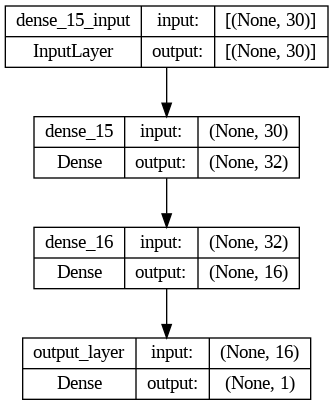

In [88]:
keras.utils.plot_model(model_cancer, show_shapes=True,
                       to_file='model_cancer.png') # 이미지 경로 (생략: ./model.png)

#### Train(학습)

In [89]:
hist = model_cancer.fit(X_train_scaled, y_train, epochs=N_EPOCH, batch_size=N_BATCH,
                        validation_data=(X_val_scaled, y_val) #validation set이 있는 경우 X, y를 튜플로 묶어서 설정.
                        )

Epoch 1/50
4/4 [==============================] - 1s 111ms/step - loss: 0.5863 - accuracy: 0.7555 - recall: 0.8904 - precision: 0.7603 - val_loss: 0.5330 - val_accuracy: 0.7912 - val_recall: 0.8772 - val_precision: 0.8065
Epoch 2/50
4/4 [==============================] - 0s 14ms/step - loss: 0.5027 - accuracy: 0.8214 - recall: 0.9211 - precision: 0.8171 - val_loss: 0.4717 - val_accuracy: 0.8681 - val_recall: 0.9298 - val_precision: 0.8689
Epoch 3/50
4/4 [==============================] - 0s 20ms/step - loss: 0.4405 - accuracy: 0.8571 - recall: 0.9386 - precision: 0.8492 - val_loss: 0.4209 - val_accuracy: 0.8681 - val_recall: 0.9298 - val_precision: 0.8689
Epoch 4/50
4/4 [==============================] - 0s 19ms/step - loss: 0.3883 - accuracy: 0.8819 - recall: 0.9430 - precision: 0.8776 - val_loss: 0.3765 - val_accuracy: 0.8681 - val_recall: 0.9298 - val_precision: 0.8689
Epoch 5/50
4/4 [==============================] - 0s 18ms/step - loss: 0.3482 - accuracy: 0.9066 - recall: 0.9605 -

#### 결과 시각화

In [91]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'recall', 'precision', 'val_loss', 'val_accuracy', 'val_recall', 'val_precision'])

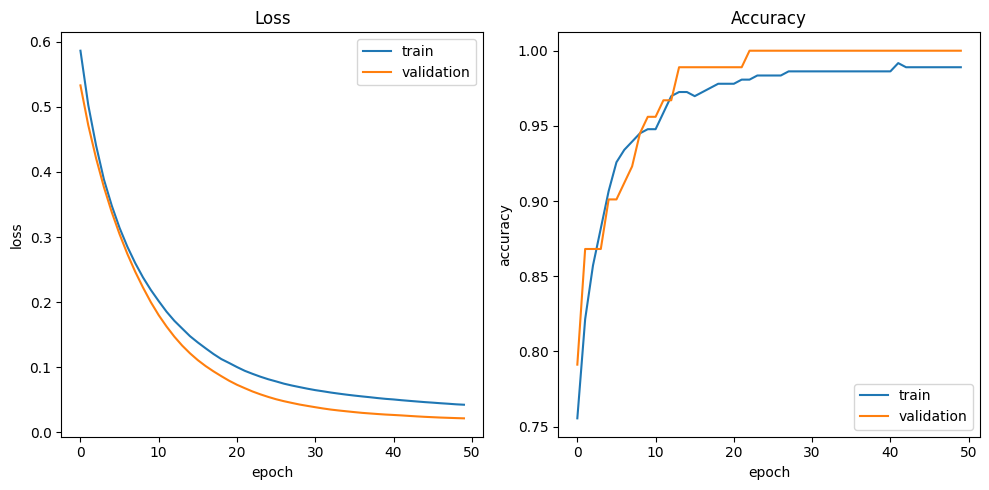

In [92]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(hist.epoch, hist.history['loss'], label="train")
plt.plot(hist.epoch, hist.history['val_loss'], label='validation')
plt.title('Loss')

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.epoch, hist.history['accuracy'], label='train')
plt.plot(hist.epoch, hist.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.tight_layout()
plt.show()

#### 최종평가

In [93]:
loss, acc, recall, precision = model_cancer.evaluate(X_test_scaled, y_test)
print(loss, acc, recall, precision)

4/4 [==============================] - 0s 4ms/step - loss: 0.0943 - accuracy: 0.9737 - recall: 0.9861 - precision: 0.9726
0.09427635371685028 0.9736841917037964 0.9861111044883728 0.9726027250289917


#### 모델저장

In [ ]:
save_dir_path = 'saved_model/cancer_model'

In [ ]:
model_cancer.save(save_dir_path)

#### 새로운 데이터 추론

In [96]:
saved_model = models.load_model(save_dir_path)
saved_model.evaluate(X_test_scaled, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.0943 - accuracy: 0.9737 - recall: 0.9861 - precision: 0.9726


[0.09427635371685028,
 0.9736841917037964,
 0.9861111044883728,
 0.9726027250289917]

In [97]:
new_X = X_test_scaled[:10]
pred = saved_model.predict(new_X)
pred.shape  #(10, 1)

1/1 [==============================] - 0s 62ms/step


(10, 1)

In [98]:
pred

array([[3.3139043e-02],
       [1.3995048e-08],
       [1.3386250e-03],
       [9.9820191e-01],
       [1.0354783e-02],
       [9.7877216e-01],
       [5.9736241e-03],
       [9.9590635e-01],
       [9.9925756e-01],
       [2.3481134e-06]], dtype=float32)

##### 모델출력결과 후처리

In [99]:
np.where(pred >= 0.5, '양성- 1', '악성- 0')

array([['악성- 0'],
       ['악성- 0'],
       ['악성- 0'],
       ['양성- 1'],
       ['악성- 0'],
       ['양성- 1'],
       ['악성- 0'],
       ['양성- 1'],
       ['양성- 1'],
       ['악성- 0']], dtype='<U5')

In [100]:
np.where(y_test[:10] == 1, "양성", "악성")

array(['악성', '악성', '악성', '양성', '악성', '양성', '악성', '양성', '양성', '악성'],
      dtype='<U2')